In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df=train

###  Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Describe string
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [11]:
ab = df.groupby("Survived").mean()
ab
v1 = ab.iloc[0,:]
v2 = ab.iloc[1,:]
abs((v2-v1)/(v1+v2))

PassengerId    0.002971
Pclass         0.129755
Age            0.038706
SibSp          0.077914
Parch          0.170176
Fare           0.372661
dtype: float64

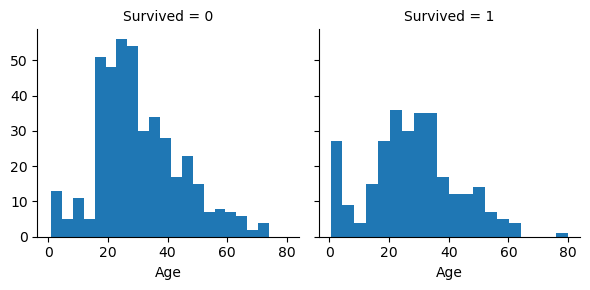

In [12]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

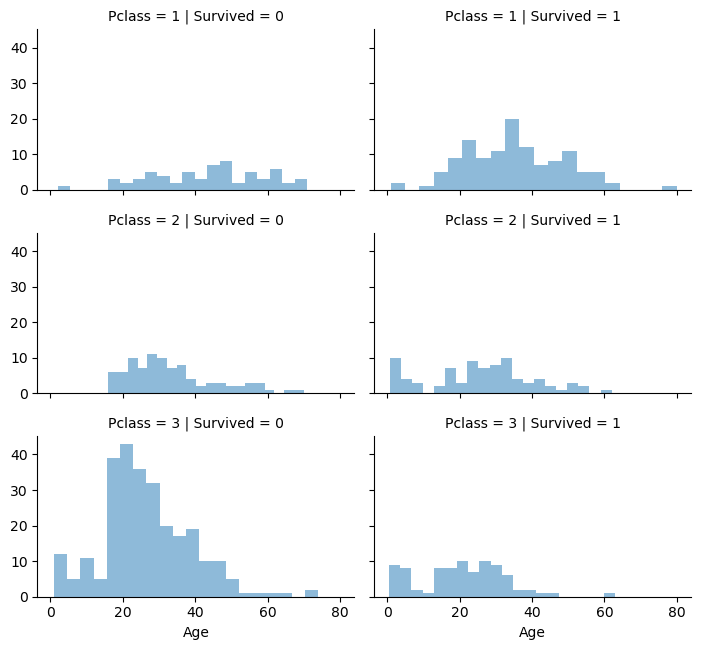

In [14]:
# grid = sns.FacetGrid(df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

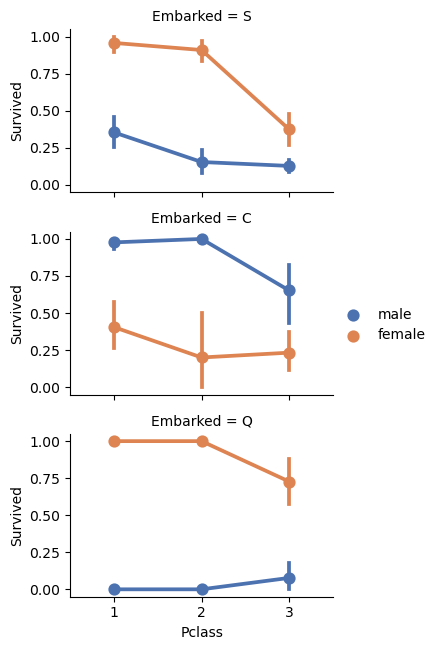

In [16]:
# grid = sns.FacetGrid(df, col='Embarked')
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

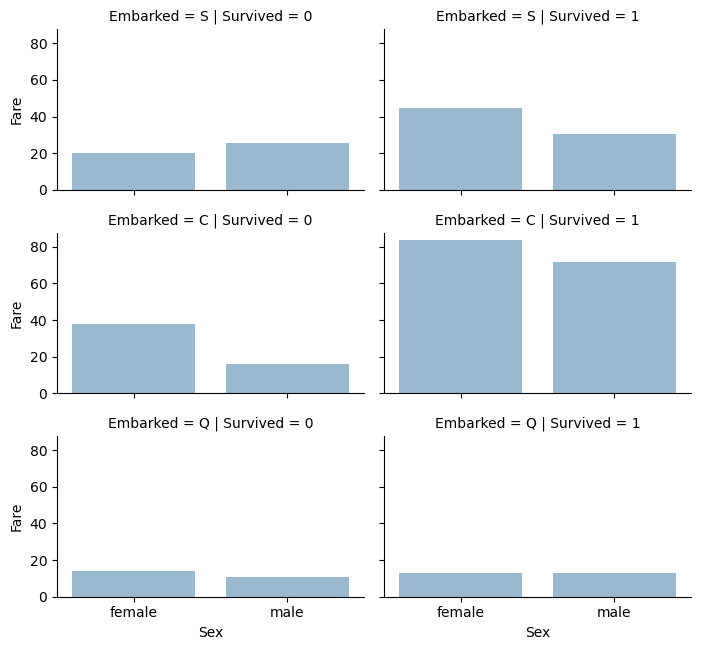

In [18]:
# grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<Axes: >

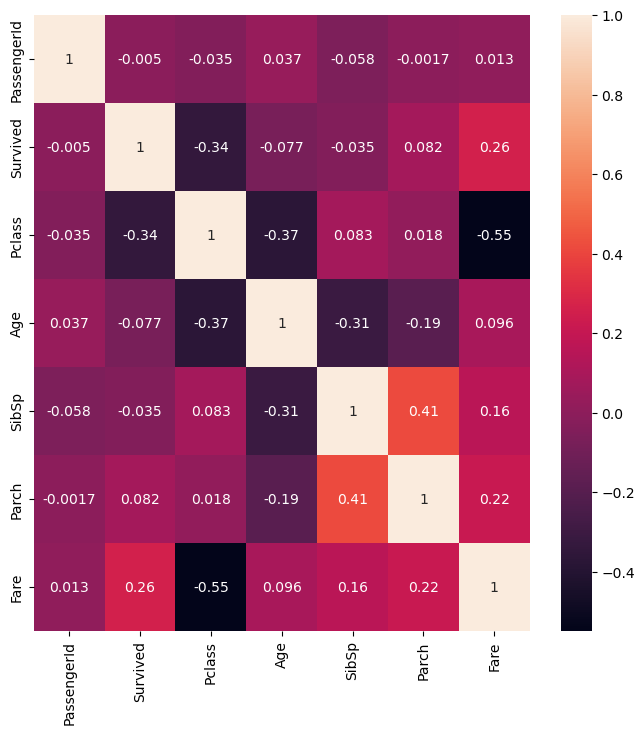

In [19]:
corr = df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

### 5 Improving Base Model

### 5.1 Based on Title (Accuracy = 80.45%)

In [20]:
print(df["Name"].head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


In [21]:
# Splitting based on Title
def get_title(name):
    if "." in name:
        return name.split(",")[1].split(".")[0].strip()
    else:
        return "Unknown"

def title_map(title):
    if title in ["Mr"]:
        return 1
    elif title in ["Master"]:
        return 3
    elif title in ["Ms", "Mlle", "Miss"]:
        return 4
    elif title in ["Mme","Mrs"]:
        return 5
    else:
        return 2

df["title"] = df["Name"].apply(get_title).apply(title_map)
print(df["title"])

0      1
1      5
2      4
3      5
4      1
      ..
886    2
887    4
888    4
889    1
890    1
Name: title, Length: 891, dtype: int64


### 5.2 Based on Fare

### 5.2.1 Based on Mean Fare (Accuracy = 78.77%)

In [22]:
mf = df["Fare"].mean()
df["Fare"] = df["Fare"]>mf
print(df["Fare"])

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool


### 3. Creating Base Model (Accuracy = 79.33%)

In [23]:
df = df.drop(["PassengerId","Name","Ticket"], axis="columns")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    bool   
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   title     891 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 63.6+ KB


In [24]:
df["Sex"] = df["Sex"].replace(["male", "female"],[0,1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    bool   
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   title     891 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 63.6+ KB


In [25]:
df["Cabin"] = df["Cabin"].isna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    bool   
 7   Cabin     891 non-null    bool   
 8   Embarked  889 non-null    object 
 9   title     891 non-null    int64  
dtypes: bool(2), float64(1), int64(6), object(1)
memory usage: 57.6+ KB


### 5.3 Grouping Title & Calculating Mean Age (Accuracy = 80.45%)

In [26]:
# Incase of taking mean age of all title, we can take mean age for a particular title only
print(df.groupby("title").Age.mean())

title
1    32.368090
2    45.545455
3     4.574167
4    21.845638
5    35.788991
Name: Age, dtype: float64


In [27]:
df["Age"][df["title"]==3]=7
mage = df.Age.mean()
df.Age = df.Age.fillna(mage)

### 3.1 Considering Mean Age for NA values (Accuracy = 78.77%)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
0,0,3,0,22.0,1,0,False,True,S,1
1,1,1,1,38.0,1,0,True,False,C,5
2,1,3,1,26.0,0,0,False,True,S,4
3,1,1,1,35.0,1,0,True,False,S,5
4,0,3,0,35.0,0,0,False,True,S,1


In [29]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    bool   
 7   Cabin       891 non-null    bool   
 8   title       891 non-null    int64  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(2), float64(1), int64(6), uint8(3)
memory usage: 53.2 KB


In [30]:
ab = df.groupby("Survived").mean()
ab
v1 = ab.iloc[0,:]
v2 = ab.iloc[1,:]
abs((v2-v1)/(v1+v2))

Pclass        0.129755
Sex           0.643977
Age           0.030072
SibSp         0.077914
Parch         0.170176
Fare          0.408208
Cabin         0.185190
title         0.374197
Embarked_C    0.331221
Embarked_Q    0.012168
Embarked_S    0.101449
dtype: float64

### Creating ML Model

In [31]:
y = df["Survived"]
df.drop("Survived", axis = "columns", inplace=True)
x = df

In [32]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,title,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.00000,1,0,False,True,1,0,0,1
1,1,1,38.00000,1,0,True,False,5,1,0,0
2,3,1,26.00000,0,0,False,True,4,0,0,1
3,1,1,35.00000,1,0,True,False,5,0,0,1
4,3,0,35.00000,0,0,False,True,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.00000,0,0,False,True,2,0,0,1
887,1,1,19.00000,0,0,False,False,4,0,0,1
888,3,1,29.69429,1,2,False,True,4,0,0,1
889,1,0,26.00000,0,0,False,False,1,1,0,0


### Random Forest Classifier Model (Accuracy = 85.47%)

In [33]:
model = RandomForestClassifier() # Accuracy = 85.47%

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

yp = model.predict(x_test)
print("Survived", sum(yp!=0))
print("Not Survived", sum(yp==0))

cm = confusion_matrix(y_test, yp)
cm

0.8379888268156425
Survived 61
Not Survived 118


array([[103,  14],
       [ 15,  47]], dtype=int64)

### XGBoost Classifier Model (Accuracy = 86.59%)

In [35]:
model = XGBClassifier() # Accuracy = 86.59

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

y_pred = model.predict(x_test)
print("Survived", sum(y_pred!=0))
print("Not Survived", sum(y_pred==0))

cm = confusion_matrix(y_test, y_pred)
cm

0.8491620111731844
Survived 57
Not Survived 122


array([[106,  11],
       [ 16,  46]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       117
           1       0.81      0.74      0.77        62

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

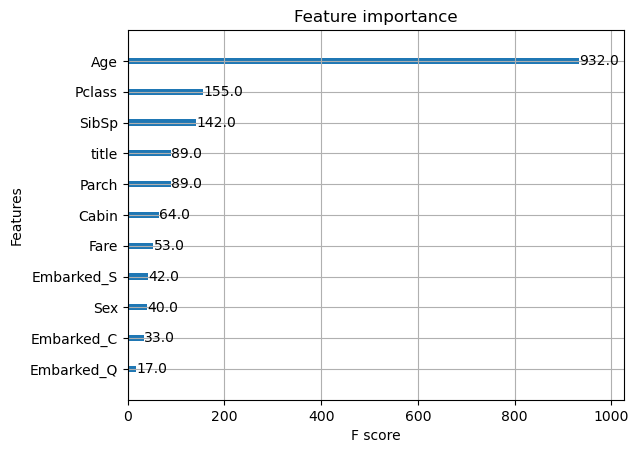

In [38]:
plot_importance(model)

### Logistic Regression Model (Accuracy = 89.39%)

In [39]:
model = LogisticRegression()

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

yp = model.predict(x_test)
print("Survived", sum(yp!=0))
print("Not Survived", sum(yp==0))

cm = confusion_matrix(y_test, yp)
cm

0.8379888268156425
Survived 69
Not Survived 110


array([[99, 18],
       [11, 51]], dtype=int64)

### Improving Base Model to Increase Accuracy

### Hyperparameter Tunning

### Random Forest Classifier Model (Using RandomizedSearchCV & GridSearchCV) (83.584% Accuracy)

In [41]:
model = RandomForestClassifier() # Accuracy = 83.287%
n_estimators = [int(x) for x in np.linspace(start=1, stop = 100, num = 40)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(1,50,num=25)]
max_depth.append(None)
min_samples_split = [2, 3, 4, 5, 7, 9, 10, 12, 14, 15, 17, 20]
min_samples_leaf = [1, 2, 4, 5, 6, 8, 9, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}

In [42]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 4)
# OR
# rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.824438202247191


{'n_estimators': 77,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 29,
 'bootstrap': True}

### XGBoost Classifier Model (Using RandomizedSearchCV & GridSearchCV) (83.287% Accuracy)

In [43]:
model = XGBClassifier()
random_grid = { 'eta': [x for x in np.linspace(start=0.01, stop=0.2, num=4)],
               'max_depth': range(1,10,1),
               'min_child_weight': range(1,13,2),
               'gamma': [i/10.0 for i in range (0,5)],
               'subsample': [i/100.0 for i in range (60, 100, 5)],
               'colsample_bytree': [i/100.0 for i in range (60, 100, 5)],
               'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
              }

In [44]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 4)
# OR
# rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8188202247191012


{'subsample': 0.75,
 'reg_alpha': 0.05,
 'min_child_weight': 3,
 'max_depth': 5,
 'gamma': 0.3,
 'eta': 0.07333333333333333,
 'colsample_bytree': 0.6}

### Hyperparameter Tunning one-by-one using GridSearchCV

### eta= 0.09090909090909091 & Accuracy= 82.158%

In [45]:
model = XGBClassifier()
random_grid = { 'eta': [x for x in np.linspace(start=0, stop=0.5, num=12)]
              }

In [46]:
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8159952723333006


{'eta': 0.045454545454545456}

### max_depth=6 & Accuracy= 82.1658%

In [48]:
model = XGBClassifier(eta=0.09090909090909091)
random_grid = {'max_depth': range(1,20,1)}

In [49]:
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.818831872352999


{'max_depth': 2}

### min_child_weight= 1 & Accuracy= 82.216%

In [50]:
model = XGBClassifier(eta=0.09090909090909091, max_depth=6)
random_grid = {'min_child_weight': range(1,15,1)}

In [51]:
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8202009258347287


{'min_child_weight': 2}

### gamma= 0.2 & Accuracy= 82.44%

In [52]:
model = XGBClassifier(eta=0.09090909090909091, max_depth=6, min_child_weight=1)
random_grid = {'gamma': [i/10.0 for i in range (0,5)]}

In [53]:
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8145769723234512


{'gamma': 0.1}

### subsample= 0.9 & Accuracy= 81.315%

In [54]:
model = XGBClassifier(eta=0.09090909090909091, max_depth=6, min_child_weight=1, gama=0.2)
random_grid = {'subsample': [i/100.0 for i in range (60, 100, 5)]}

In [55]:
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8159952723333005


{'subsample': 0.85}

### colsample_bytree= 0.73 & Accuracy= 81.176%

In [56]:
model = XGBClassifier(eta=0.09090909090909091, max_depth=6, min_child_weight=1, gama=0.2, subsample=0.9)
random_grid = {'colsample_bytree': [i/100.0 for i in range (70, 80, 1)]
              }

In [57]:
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8117699202206244


{'colsample_bytree': 0.73}

### reg_alpha= 0.005 & Accuracy= 81.317%

In [58]:
model = XGBClassifier(eta=0.09090909090909091, max_depth=6, min_child_weight=1, gama=0.2, subsample=0.9, colsample_bytree=0.73)
random_grid = {'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
              }

In [59]:
rf_random = GridSearchCV(model, random_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8117699202206244


{'reg_alpha': 0}

In [60]:

model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.73, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.09090909090909091,
              eval_metric=None, feature_types=None, gama=0.2, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

### Overall Accuracy after cross validation (cv) on GridSearchCV = 81.32%

In [63]:
model = XGBClassifier(eta=0.09090909090909091, max_depth=6, min_child_weight=1, gama=0.2, subsample=0.9, colsample_bytree=0.73, reg_alpha=0.005)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rf_random.fit(x_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.8117699202206244


{'reg_alpha': 0}

In [65]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.73, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.09090909090909091,
              eval_metric=None, feature_types=None, gama=0.2, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

### Final Accuracy based on optimized hyperparameters = 93%

In [66]:
model = XGBClassifier(eta=0.09090909090909091, 
                      max_depth=6, 
                      min_child_weight=1, 
                      gama=0.2, 
                      subsample=0.9, 
                      colsample_bytree=0.73, 
                      reg_alpha=0.005)

In [67]:
model.fit(x, y)
print(model.score(x_test, y_test))

y_pred = model.predict(x_test)
print("Survived", sum(y_pred!=0))
print("Not Survived", sum(y_pred==0))

cm = confusion_matrix(y_test, y_pred)
cm

0.9273743016759777
Survived 54
Not Survived 125


array([[115,   3],
       [ 10,  51]], dtype=int64)

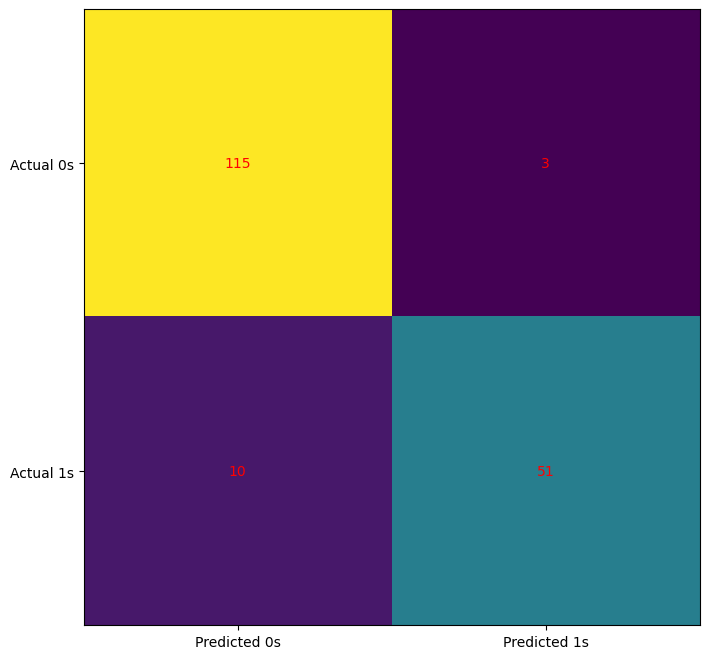

In [68]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Final Analysis

<Axes: >

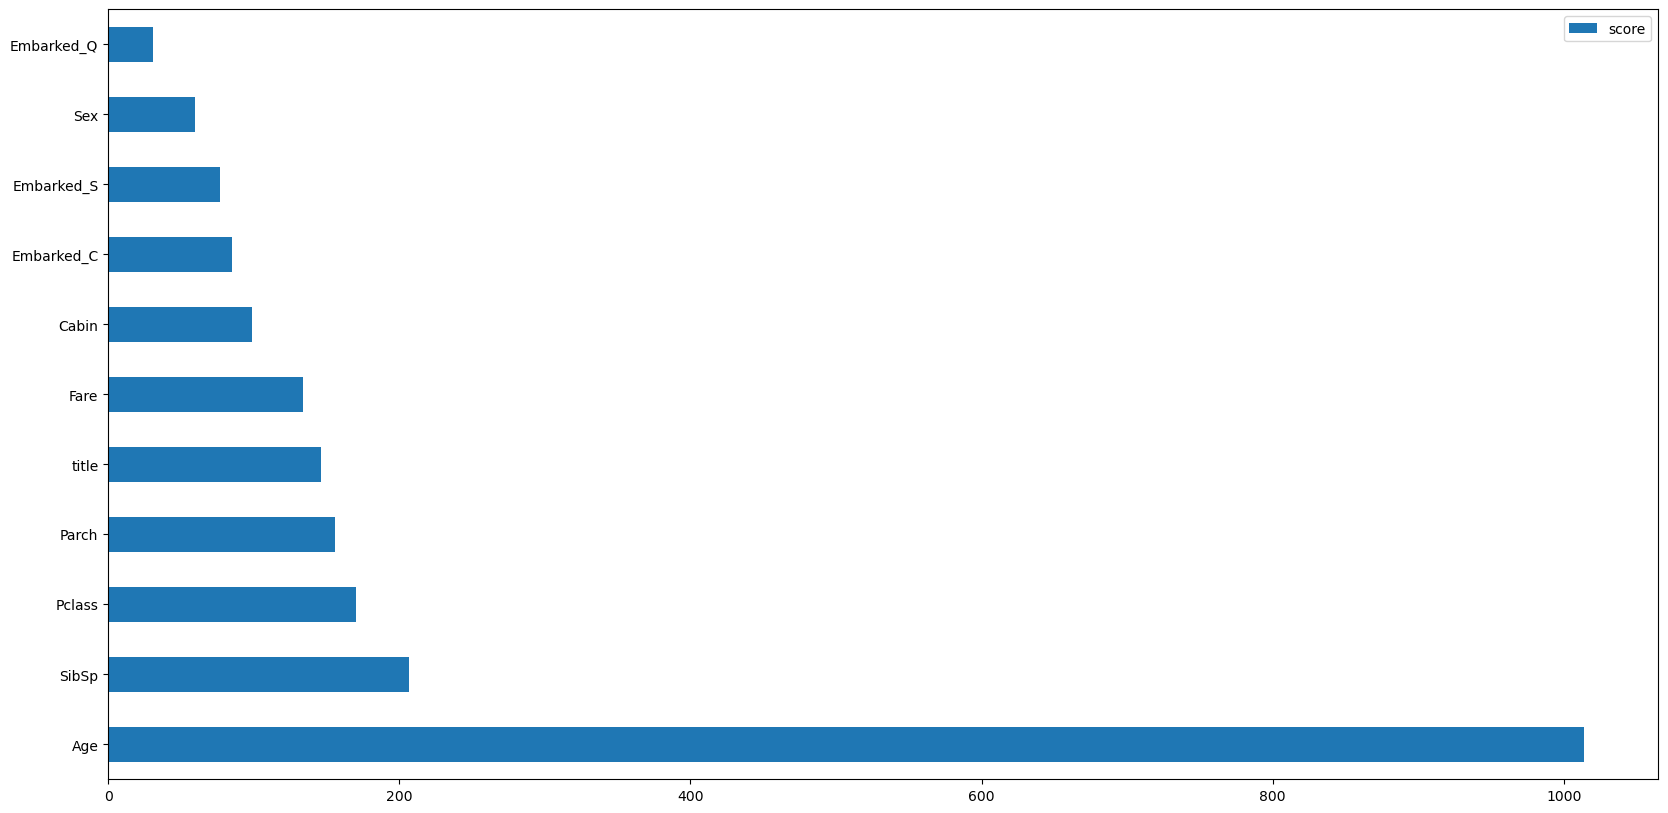

In [69]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       118
           1       0.94      0.84      0.89        61

    accuracy                           0.93       179
   macro avg       0.93      0.91      0.92       179
weighted avg       0.93      0.93      0.93       179



In [71]:
predict_output = model.predict(x)   #Provide array of predicted output
predict_output

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

### ROC curve , Threshold & Best score

Best Threshold=1.000000, G-Mean=0.878


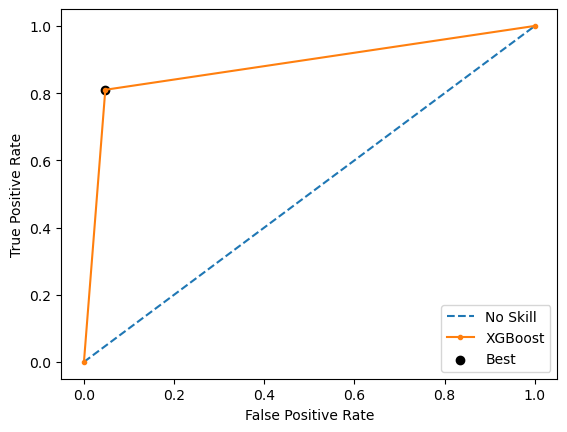

In [72]:
from numpy import sqrt
from numpy import argmax

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y, predict_output)
# plot the roc curve for the model

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Test Submission

In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [75]:
print(test["Name"].head())

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object


In [76]:
def get_title(name):
    if "." in name:
        return name.split(",")[1].split(".")[0].strip()
    else:
        return "Unknown"

def title_map(title):
    if title in ["Mr"]:
        return 1
    elif title in ["Master"]:
        return 3
    elif title in ["Ms", "Mlle", "Miss"]:
        return 4
    elif title in ["Mme","Mrs"]:
        return 5
    else:
        return 2

test["title"] = test["Name"].apply(get_title).apply(title_map)
print(test["title"])

0      1
1      5
2      1
3      1
4      5
      ..
413    1
414    2
415    1
416    1
417    3
Name: title, Length: 418, dtype: int64


In [77]:
mf = test["Fare"].mean()
test["Fare"] = test["Fare"]>mf
print(test["Fare"])

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414     True
415    False
416    False
417    False
Name: Fare, Length: 418, dtype: bool


In [78]:
test = test.drop(["Name","Ticket"], axis="columns")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    bool   
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   title        418 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 29.9+ KB


In [79]:
test["Sex"] = test["Sex"].replace(["male", "female"],[0,1])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    bool   
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   title        418 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 29.9+ KB


In [80]:
test["Cabin"] = test["Cabin"].isna()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    bool   
 7   Cabin        418 non-null    bool   
 8   Embarked     418 non-null    object 
 9   title        418 non-null    int64  
dtypes: bool(2), float64(1), int64(6), object(1)
memory usage: 27.1+ KB


In [81]:
print(test.groupby("title").Age.mean())

test["Age"][test["title"]==3]=7

mage = test.Age.mean()
test.Age = test.Age.fillna(mage)

title
1    32.000000
2    43.833333
3     7.406471
4    21.774844
5    38.903226
Name: Age, dtype: float64


In [82]:
test = pd.get_dummies(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    bool   
 7   Cabin        418 non-null    bool   
 8   title        418 non-null    int64  
 9   Embarked_C   418 non-null    uint8  
 10  Embarked_Q   418 non-null    uint8  
 11  Embarked_S   418 non-null    uint8  
dtypes: bool(2), float64(1), int64(6), uint8(3)
memory usage: 25.0 KB


In [83]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,title,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,False,True,1,0,1,0
1,893,3,1,47.0,1,0,False,True,5,0,0,1
2,894,2,0,62.0,0,0,False,True,1,0,1,0
3,895,3,0,27.0,0,0,False,True,1,0,0,1
4,896,3,1,22.0,1,1,False,True,5,0,0,1


In [84]:
x_test  = test.drop("PassengerId", axis=1).copy()
x.shape, y.shape, x_test.shape

((891, 11), (891,), (418, 11))

In [85]:
df.shape, test.shape, x_test.shape

((891, 11), (418, 12), (418, 11))

### Using the model with best accuracy

In [86]:
model = XGBClassifier(eta=0.09090909090909091, 
                      max_depth=6, 
                      min_child_weight=1, 
                      gama=0.2, 
                      subsample=0.9, 
                      colsample_bytree=0.73, 
                      reg_alpha=0.005)

In [87]:
model.fit(x, y)
print(model.score(x, y))

y_pred = model.predict(x_test)

print("Survived", sum(y_pred!=0))
print("Not Survived", sum(y_pred==0))

0.8978675645342312
Survived 156
Not Survived 262


### Submission

In [88]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
